# **1η Υποχρεωτική Εργασία** / *Σωτήριος-Λουκάς Καμπύλης, <u>ΑΕΜ:3805</u>*

## Γενικές Οδηγίες (*για το Dataset της MNIST*):

Για τις ανάγκες αυτής της εργασίας χρησιμοποιήθηκε το σύνηθες *Dataset* της **MNIST** με τα *χειρόγραφα ψηφία*, το οποίο φορτώθηκε από το *keras*. Οι εικόνες αποτελούνται από **784 pixels** (ή αλλιώς **28x28**). Η βάση περιέχει **60.000** εικόνες ψηφίων με σκοπό την χρήση τους στην εκπαίδευση (*train*) και **10.000** για τον έλεγχο της ποιότητας της εκπαίδευσης (*test*). Επίσης, παρέχονται και οι αντίστοιχες ετικέτες (*labels*), οι οποίες υποδεικνύουν το ψηφίο το οποίο απεικονίζεται στην εκάστοτε εικόνα. Σκοπός και κύριος στόχος της συγκεκριμένης εργασίας είναι: Η σωστή μοντελοποίηση του προβλήματος, ο σωστός χειρισμός των δεδομένων (*DataSet*) και η κατανόηση/δημιουργία/βελτιστοποίηση ενός νευρωνικού δικτύου!

# 1 Εισαγωγή, Φόρτωση & Επεξεργασία των Δεδομένων.

## 1.1 Εισαγωγή Απαραίτητων Βιβλιοθηκών

Παρακάτω εισάγονται οι απαραίτητες βιβλιοθήκες για να τρέξει ο υπόλοιπος κώδικας. Αυτές κρίνονται απαραίτητες για την σωστή διαχείρηση του *Dataset* και την δημιουργία/αξιολόγηση των νευρωνικών δικτύων (ως προς τις παραμέτρους τους). Μάλιστα, μερικές βιβλιοθήκες (**seaborn/timeit/matplotlib**) βοηθάνε στην αναπαράσταση γραφημάτων και στην καταγραφή χρόνου.

In [1]:
import numpy as np
import seaborn as sns
import keras
import timeit

from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt
from keras.datasets import mnist
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense


## 1.2 Φόρτωση & Επεξεργασία Δεδομένων

Αρχικά, *φορτώνουμε* το σύνολο δεδομένων της **MNIST**. Ύστερα, *κανονικοποιούμε* τις τιμές φωτεινότητας μεταξύ **0** και **1** (από **0** και **255**) έτσι ώστε να δωθεί στα δεδομένα μία κοινή κατάσταση, δηλαδή όλες οι μεταβλητές να είναι κεντραρισμένες παρόμοια. Αυτή η διαδικασία κρίνεται εξαιρετικά σημαντική για την σωστή αξιολόγηση των μοντέλων (η οποία θα γίνει μέσα στα νευρωνικά δίκτυα). Μάλιστα, με την `astype('float32')` μετατρέπουμε το σύνολο δεδομένων σε *32 bit πραγματικούς*, διότι έτσι θα εφαρμοστεί καλύτερα στην *RAM* (και οι πράξεις γίνονται πιο σωστά)!

In [2]:
# Φορτώνουμε το σύνολο δεδομένων της MNIST
(train_data, train_labels), (test_data, test_labels) = mnist.load_data()


11490434/11490434 [==============================] - 0s 0us/step


In [3]:
# Κανονικοποιούμε τα δεδομένα μεταξύ 0 και 1 (από 0 και 255)
train_data = train_data.astype('float32')
test_data = test_data.astype('float32')
train_data = train_data / 255.0
test_data = test_data / 255.0

# Εκτυπώνω τις τιμές έτσι ώστε να δω πως όλα πήγαν καλά!
print("Train/test data shape:", train_data.shape, test_data.shape)
print("Train/test labels shape:", train_labels.shape, test_labels.shape)


Train/test data shape: (60000, 28, 28) (10000, 28, 28)
Train/test labels shape: (60000,) (10000,)


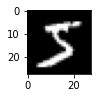

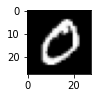

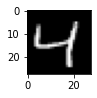

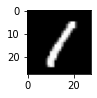

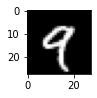

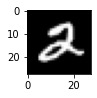

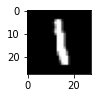

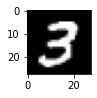

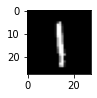

In [4]:
# Εκτυπώνω τα χειρόγραφα ψηφία έτσι ώστε να δω το Dataset!
for i in range(9):
  plt.subplot(330 + 1 + i)
  plt.imshow(train_data[i], cmap=plt.get_cmap('gist_gray'))
  plt.show()


[False]
[False]


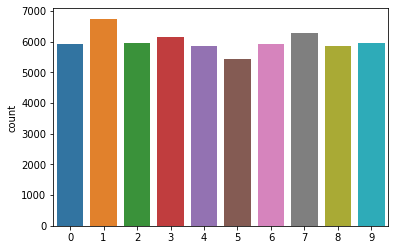

In [5]:
# Βλέπω αν λείπουν τιμές στο Dataset
print(np.unique(np.isnan(train_data)))
print(np.unique(np.isnan(test_data)))

# Δίνω μια οπτική ανάλυση στην κατανομή των χειρόγραφων ψηφίων μέσα στο Dataset
sns.countplot(x=train_labels)

In [6]:
# Μετατροπή των train_data/test_data από τρισδιάστατο πίνακα (60000, 28, 28) σε
# δισδιάστατο πίνακα (60000, 784)
train_data = train_data.reshape(60000, 28*28)
test_data = test_data.reshape(10000, 28*28)
# Εφαρμογή στις ετικέτες One Hot Encoding
train_labels = np_utils.to_categorical(train_labels, 10)
test_labels = np_utils.to_categorical(test_labels, 10)

# Εκτυπώνω τις τιμές έτσι ώστε να δω πως όλα πήγαν καλά!
print("Train/test data shape:", train_data.shape, test_data.shape)
print("Train/test labels shape:", train_labels.shape, test_labels.shape)

Train/test data shape: (60000, 784) (10000, 784)
Train/test labels shape: (60000, 10) (10000, 10)


# 2 Δημιουργία & Αξιολόγηση ως προς τις παραμέτρους ενός Νευρωνικού Δικτύου.

## 2.1 Δημιουργία ενός Νευρωνικού Δικτύου (και πειράματα με τον αριθμό των νευρώνων και τα hidden layers).

Το νευρωνικό δίκτυο το οποίο δημιουργείται στα πλαίσια της εργασίας προορίζεται για την κατηγοριοποίηση των χειρόγραφων ψηφίων της βάσης σε μία από τις πιθανές κλάσεις και δημιουργηθεί μέσα από τα έτοιμα νευρωνικά δίκτυα του *keras*. Είναι εύκολο να κατανοήσει κανείς ότι στο επίπεδο εισόδου του δικτύου ο αριθμός των νευρώνων ϑα ισούται με **784** (ΔΕΝ γίνεται χρήση **PCA**) ενώ σε αυτό της εξόδου με **10** (λόγω των χειρόγραφων ψηφίων). Στα κρυφά επίπεδα (*hidden layers*) γίνονται διάφορες επιλογές για τον αριθμό των νευρώνων, οι οποίες αλλάζουν σύμφωνα με την ελπίδα να βελτιστοποιηθεί το δίκτυο (το ίδιο ισχύει και για τις υπόλοιπες παραμέτρους τις οποίες ΔΕΝ μπορούμε να παραγωγίσουμε). Για το συγκεκριμένο πρόβλημα ϑα γίνει χρήση ενός τυπικού νευρωνικού δικτύου (*Sequential*). Επίσης, για την συνάρτηση ενεργοποίησης κάθε νευρώνα του δικτύου γίνεται χρήση της σιγμοειδής συνάρτησης λόγω της απλότητας της σε σχέση με τις υπόλοιπες. Επίσης γίνεται χρήση της συνάρτησης *Softmax* στην έξοδο του δικτύου με σκοπό την αποτύπωση των αποτελεσμάτων σε δίαστημα πιθανότητας. Τέλος, χρησιμοποιείται για βελτιστοποιητής ο *SGD* (Stohastic Gradient Descent) και για σφάλμα το *Μέσο Τετραγωνικό Σφάλμα* ή αλλιώς *L2 Loss* (γιατί αυτό διδαχθήκαμε και στο μάθημα). Αυτό είναι το γενικό μοντέλο (ή μοντέλο πρώτυπο) το οποίο θα αλλάζει κάθε φορά τις παραμέτρους του για την βελτιστοποίηση του Νευρωνικού μας Δικτύου!

Epoch 1/20
469/469 [==============================] - 4s 3ms/step - loss: 0.0920 - accuracy: 0.1077 - val_loss: 0.0912 - val_accuracy: 0.1267
Epoch 2/20
469/469 [==============================] - 1s 3ms/step - loss: 0.0908 - accuracy: 0.1060 - val_loss: 0.0906 - val_accuracy: 0.0834
Epoch 3/20
469/469 [==============================] - 1s 3ms/step - loss: 0.0904 - accuracy: 0.0881 - val_loss: 0.0903 - val_accuracy: 0.0886
Epoch 4/20
469/469 [==============================] - 1s 3ms/step - loss: 0.0902 - accuracy: 0.1094 - val_loss: 0.0901 - val_accuracy: 0.1113
Epoch 5/20
469/469 [==============================] - 1s 3ms/step - loss: 0.0901 - accuracy: 0.1272 - val_loss: 0.0900 - val_accuracy: 0.1202
Epoch 6/20
469/469 [==============================] - 1s 3ms/step - loss: 0.0900 - accuracy: 0.1317 - val_loss: 0.0900 - val_accuracy: 0.1301
Epoch 7/20
469/469 [==============================] - 1s 3ms/step - loss: 0.0900 - accuracy: 0.1382 - val_loss: 0.0899 - val_accuracy: 0.1343
Epoch 

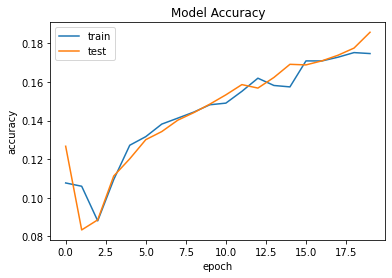

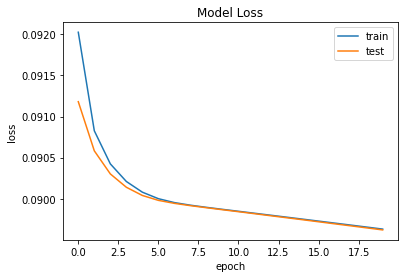

Time:  45.488181752 seconds


In [7]:
# Δημιουργία & 1η Δοκιμή Νευρωνικού Δικτύου!

# Αρχή Χρονομέτρησης
start = timeit.default_timer()

# Σειριακό μοντέλο Νευρωνικού Δικτύου
model = Sequential()
# Kρυφό Eπίπεδο με 256 νευρώνες, 784 διαστάσεις & σιγμοειδή συνάρτηση ενεργοποίησης
# Dense = Full Connected (Άρα όλοι οι νευρώνες συνδέονται με όλους)
model.add(Dense(256, input_dim=(784), activation='sigmoid'))
# Ακόμα ένα Kρυφό Eπίπεδο με 256 νευρώνες, 784 διαστάσεις & σιγμοειδή συνάρτηση ενεργοποίησης
model.add(Dense(256, input_dim=(784), activation='sigmoid'))
# Επίπεδο Εξόδου με 10 (λόγω των χειρόγραφων ψηφίων) νευρώνες με softmax συνάρτηση ενεργοποίησης
model.add(Dense(10, activation='softmax'))

# Βελτιστοποιητής: Στοχαστική Επικλινής Κάθοδος και Σφάλμα: L2 (Μέσο Τετραγωνικό Σφάλμα)
model.compile(optimizer='sgd', loss='mean_squared_error', metrics=['accuracy'])

# 128 Δείγματα ανα επανάληψη σε 20 εποχές με verbose=1 (για να εμφανίζει τις εποχές!)
results = model.fit(train_data, train_labels, batch_size=128, epochs=20, verbose=1, validation_data=(test_data, test_labels))

# Εμφάνιση αποτελεσμάτων σε 2 Γραφήματα
# Για το accuracy
plt.plot(results.history['accuracy'])
plt.plot(results.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()
# Για το loss
plt.plot(results.history['loss'])
plt.plot(results.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

# Τέλος Χρονομέτρησης
stop = timeit.default_timer()
print('Time: ', stop - start, 'seconds')


In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               200960    
                                                                 
 dense_1 (Dense)             (None, 256)               65792     
                                                                 
 dense_2 (Dense)             (None, 10)                2570      
                                                                 
Total params: 269,322
Trainable params: 269,322
Non-trainable params: 0
_________________________________________________________________


Ας δοκιμάσουμε να αλλάξουμε τους νευρώνες από 256 σε 512.

Epoch 1/20
469/469 [==============================] - 2s 4ms/step - loss: 0.0911 - accuracy: 0.0886 - val_loss: 0.0902 - val_accuracy: 0.1076
Epoch 2/20
469/469 [==============================] - 2s 3ms/step - loss: 0.0901 - accuracy: 0.1099 - val_loss: 0.0900 - val_accuracy: 0.1140
Epoch 3/20
469/469 [==============================] - 2s 4ms/step - loss: 0.0900 - accuracy: 0.1124 - val_loss: 0.0899 - val_accuracy: 0.1142
Epoch 4/20
469/469 [==============================] - 2s 3ms/step - loss: 0.0899 - accuracy: 0.1126 - val_loss: 0.0899 - val_accuracy: 0.1139
Epoch 5/20
469/469 [==============================] - 2s 4ms/step - loss: 0.0899 - accuracy: 0.1125 - val_loss: 0.0899 - val_accuracy: 0.1138
Epoch 6/20
469/469 [==============================] - 3s 6ms/step - loss: 0.0899 - accuracy: 0.1126 - val_loss: 0.0898 - val_accuracy: 0.1136
Epoch 7/20
469/469 [==============================] - 2s 3ms/step - loss: 0.0898 - accuracy: 0.1126 - val_loss: 0.0898 - val_accuracy: 0.1135
Epoch 

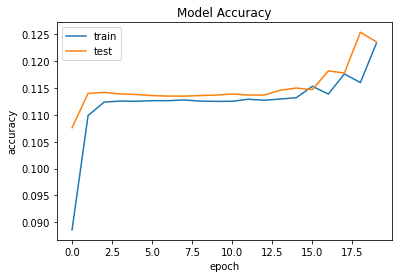

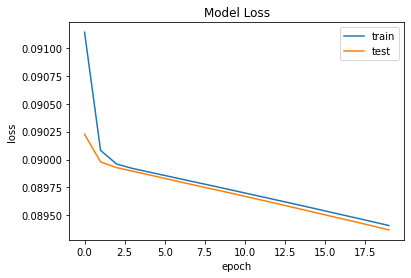

Time:  41.734364115000005 seconds


In [9]:
# 2η Δοκιμή Νευρωνικού Δικτύου! (Αλλαγή των νευρώνων των κρυφών επιπέδων από 256 σε 512)

# Αρχή Χρονομέτρησης
start = timeit.default_timer()

# Σειριακό μοντέλο Νευρωνικού Δικτύου
model = Sequential()
# (ΑΛΛΑΓΗ) Kρυφό Eπίπεδο με 512 νευρώνες, 784 διαστάσεις & σιγμοειδή συνάρτηση ενεργοποίησης
# Dense = Full Connected (Άρα όλοι οι νευρώνες συνδέονται με όλους)
model.add(Dense(512, input_dim=(784), activation='sigmoid'))
# (ΑΛΛΑΓΗ) Ακόμα ένα Kρυφό Eπίπεδο με 512 νευρώνες, 784 διαστάσεις & σιγμοειδή συνάρτηση ενεργοποίησης
model.add(Dense(512, input_dim=(784), activation='sigmoid'))
# Επίπεδο Εξόδου με 10 (λόγω των χειρόγραφων ψηφίων) νευρώνες με softmax συνάρτηση ενεργοποίησης
model.add(Dense(10, activation='softmax'))

# Βελτιστοποιητής: Στοχαστική Επικλινής Κάθοδος και Σφάλμα: L2 (Μέσο Τετραγωνικό Σφάλμα)
model.compile(optimizer='sgd', loss='mean_squared_error', metrics=['accuracy'])

# 128 Δείγματα ανα επανάληψη σε 20 εποχές με verbose=1 (για να εμφανίζει τις εποχές!)
results = model.fit(train_data, train_labels, batch_size=128, epochs=20, verbose=1, validation_data=(test_data, test_labels))

# Εμφάνιση αποτελεσμάτων σε 2 Γραφήματα
# Για το accuracy
plt.plot(results.history['accuracy'])
plt.plot(results.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()
# Για το loss
plt.plot(results.history['loss'])
plt.plot(results.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

# Τέλος Χρονομέτρησης
stop = timeit.default_timer()
print('Time: ', stop - start, 'seconds')


In [10]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 512)               401920    
                                                                 
 dense_4 (Dense)             (None, 512)               262656    
                                                                 
 dense_5 (Dense)             (None, 10)                5130      
                                                                 
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


<u>Σχόλια για την αύξηση των νευρώνων στα κρυφά επίπεδα</u>: **ΔΕΝ** παρατηρούμε κάποια ουσιαστική βελτιστοποίηση στις προβλέψεις. Οπότε ας δοκιμάσουμε να αυξήσουμε τα κρυφά επίπεδα!

Epoch 1/20
469/469 [==============================] - 2s 4ms/step - loss: 0.0926 - accuracy: 0.1050 - val_loss: 0.0913 - val_accuracy: 0.1215
Epoch 2/20
469/469 [==============================] - 2s 4ms/step - loss: 0.0907 - accuracy: 0.1127 - val_loss: 0.0904 - val_accuracy: 0.1010
Epoch 3/20
469/469 [==============================] - 2s 4ms/step - loss: 0.0902 - accuracy: 0.1023 - val_loss: 0.0902 - val_accuracy: 0.1010
Epoch 4/20
469/469 [==============================] - 2s 3ms/step - loss: 0.0901 - accuracy: 0.1028 - val_loss: 0.0901 - val_accuracy: 0.1135
Epoch 5/20
469/469 [==============================] - 2s 3ms/step - loss: 0.0900 - accuracy: 0.1124 - val_loss: 0.0900 - val_accuracy: 0.1135
Epoch 6/20
469/469 [==============================] - 2s 4ms/step - loss: 0.0900 - accuracy: 0.1124 - val_loss: 0.0900 - val_accuracy: 0.1135
Epoch 7/20
469/469 [==============================] - 2s 3ms/step - loss: 0.0900 - accuracy: 0.1124 - val_loss: 0.0900 - val_accuracy: 0.1135
Epoch 

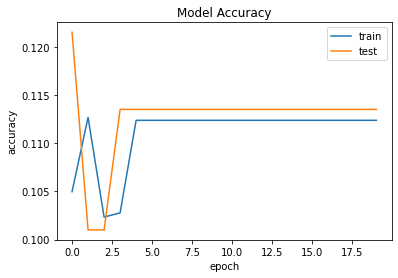

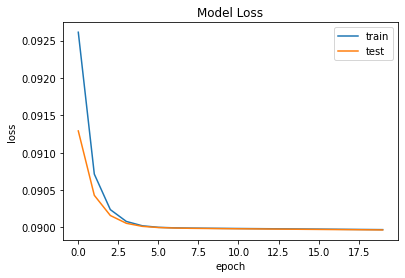

Time:  32.99532854500001 seconds


In [11]:
# 3η Δοκιμή Νευρωνικού Δικτύου! (Προσθήκη ενός ακόμα κρυμμένου επιπέδου)

# Αρχή Χρονομέτρησης
start = timeit.default_timer()

# Σειριακό μοντέλο Νευρωνικού Δικτύου
model = Sequential()
# (ΑΛΛΑΓΗ) Kρυφό Eπίπεδο με 256 νευρώνες, 784 διαστάσεις & σιγμοειδή συνάρτηση ενεργοποίησης
# Dense = Full Connected (Άρα όλοι οι νευρώνες συνδέονται με όλους)
model.add(Dense(256, input_dim=(784), activation='sigmoid'))
# (ΑΛΛΑΓΗ) Ακόμα ένα Kρυφό Eπίπεδο με 256 νευρώνες, 784 διαστάσεις & σιγμοειδή συνάρτηση ενεργοποίησης
model.add(Dense(256, input_dim=(784), activation='sigmoid'))
# (ΠΡΟΣΘΗΚΗ) Ακόμα ένα Kρυφό Eπίπεδο με 256 νευρώνες, 784 διαστάσεις & σιγμοειδή συνάρτηση ενεργοποίησης
model.add(Dense(256, input_dim=(784), activation='sigmoid'))
# Επίπεδο Εξόδου με 10 (λόγω των χειρόγραφων ψηφίων) νευρώνες με softmax συνάρτηση ενεργοποίησης
model.add(Dense(10, activation='softmax'))

# Βελτιστοποιητής: Στοχαστική Επικλινής Κάθοδος και Σφάλμα: L2 (Μέσο Τετραγωνικό Σφάλμα)
model.compile(optimizer='sgd', loss='mean_squared_error', metrics=['accuracy'])

# 128 Δείγματα ανα επανάληψη σε 20 εποχές με verbose=1 (για να εμφανίζει τις εποχές!)
results = model.fit(train_data, train_labels, batch_size=128, epochs=20, verbose=1, validation_data=(test_data, test_labels))

# Εμφάνιση αποτελεσμάτων
# Για το accuracy
plt.plot(results.history['accuracy'])
plt.plot(results.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()
# Για το loss
plt.plot(results.history['loss'])
plt.plot(results.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

# Τέλος Χρονομέτρησης
stop = timeit.default_timer()
print('Time: ', stop - start, 'seconds')


In [12]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 256)               200960    
                                                                 
 dense_7 (Dense)             (None, 256)               65792     
                                                                 
 dense_8 (Dense)             (None, 256)               65792     
                                                                 
 dense_9 (Dense)             (None, 10)                2570      
                                                                 
Total params: 335,114
Trainable params: 335,114
Non-trainable params: 0
_________________________________________________________________


<u>Σχόλια για την προσθήκη ενός ακόμα κρυφού επιπέδου</u>: **ΔΕΝ** παρατηρούμε κάποια ουσιαστική βελτιστοποίηση στις προβλέψεις. Οπότε ας δοκιμάσουμε να αλλάξουμε και τον αριθμό των νευρώνων!

Epoch 1/20
469/469 [==============================] - 2s 4ms/step - loss: 0.0914 - accuracy: 0.1009 - val_loss: 0.0904 - val_accuracy: 0.1042
Epoch 2/20
469/469 [==============================] - 2s 4ms/step - loss: 0.0902 - accuracy: 0.1044 - val_loss: 0.0901 - val_accuracy: 0.1028
Epoch 3/20
469/469 [==============================] - 2s 5ms/step - loss: 0.0900 - accuracy: 0.1063 - val_loss: 0.0900 - val_accuracy: 0.1135
Epoch 4/20
469/469 [==============================] - 2s 4ms/step - loss: 0.0900 - accuracy: 0.1124 - val_loss: 0.0900 - val_accuracy: 0.1135
Epoch 5/20
469/469 [==============================] - 2s 4ms/step - loss: 0.0900 - accuracy: 0.1124 - val_loss: 0.0900 - val_accuracy: 0.1135
Epoch 6/20
469/469 [==============================] - 2s 3ms/step - loss: 0.0900 - accuracy: 0.1124 - val_loss: 0.0900 - val_accuracy: 0.1135
Epoch 7/20
469/469 [==============================] - 2s 3ms/step - loss: 0.0900 - accuracy: 0.1124 - val_loss: 0.0900 - val_accuracy: 0.1135
Epoch 

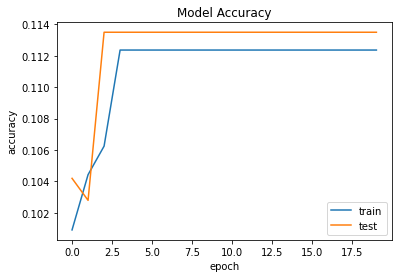

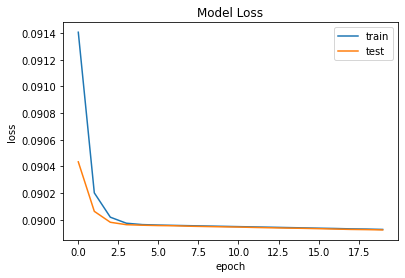

Time:  34.73902851700001 seconds


In [13]:
# 4η Δοκιμή Νευρωνικού Δικτύου! (Αλλαγή των νευρώνων των κρυφών επιπέδων από 256 σε 512)

# Αρχή Χρονομέτρησης
start = timeit.default_timer()

# Σειριακό μοντέλο Νευρωνικού Δικτύου
model = Sequential()
# (ΑΛΛΑΓΗ) Kρυφό Eπίπεδο με 512 νευρώνες, 784 διαστάσεις & σιγμοειδή συνάρτηση ενεργοποίησης
# Dense = Full Connected (Άρα όλοι οι νευρώνες συνδέονται με όλους)
model.add(Dense(512, input_dim=(784), activation='sigmoid'))
# (ΑΛΛΑΓΗ) Ακόμα ένα Kρυφό Eπίπεδο με 512 νευρώνες, 784 διαστάσεις & σιγμοειδή συνάρτηση ενεργοποίησης
model.add(Dense(512, input_dim=(784), activation='sigmoid'))
# (ΑΛΛΑΓΗ) Ακόμα ένα Kρυφό Eπίπεδο με 256 νευρώνες, 784 διαστάσεις & σιγμοειδή συνάρτηση ενεργοποίησης
model.add(Dense(512, input_dim=(784), activation='sigmoid'))
# Επίπεδο Εξόδου με 10 (λόγω των χειρόγραφων ψηφίων) νευρώνες με softmax συνάρτηση ενεργοποίησης
model.add(Dense(10, activation='softmax'))

# Βελτιστοποιητής: Στοχαστική Επικλινής Κάθοδος και Σφάλμα: L2 (Μέσο Τετραγωνικό Σφάλμα)
model.compile(optimizer='sgd', loss='mean_squared_error', metrics=['accuracy'])

# 128 Δείγματα ανα επανάληψη σε 20 εποχές με verbose=1 (για να εμφανίζει τις εποχές!)
results = model.fit(train_data, train_labels, batch_size=128, epochs=20, verbose=1, validation_data=(test_data, test_labels))

# Εμφάνιση αποτελεσμάτων
# Για το accuracy
plt.plot(results.history['accuracy'])
plt.plot(results.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()
# Για το loss
plt.plot(results.history['loss'])
plt.plot(results.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

# Τέλος Χρονομέτρισης
stop = timeit.default_timer()
print('Time: ', stop - start, 'seconds')


In [14]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 512)               401920    
                                                                 
 dense_11 (Dense)            (None, 512)               262656    
                                                                 
 dense_12 (Dense)            (None, 512)               262656    
                                                                 
 dense_13 (Dense)            (None, 10)                5130      
                                                                 
Total params: 932,362
Trainable params: 932,362
Non-trainable params: 0
_________________________________________________________________


<u>Σχόλια γενικά για τις προσθήκες και τις αλλαγές στους νευρώνες και στα κρυφά επίπεδα</u>: **ΔΕΝ** παρατηρούμε κάποια ουσιαστική βελτιστοποίηση στις προβλέψεις. Οπότε δεν έχει νόημα να προβώ σε περισσότερες δοκιμές ως προς αυτά. Για αυτό τον λόγο θα δοκιμάσω να πειραματιστώ με το *Batch size* του νευρωνικού δικτύου (πάνω στο πρότυπο δίκτυο).

## 2.2 Πειράματα με το Batch Size (δείγματα ανά επανάληψη σε κάθε εποχή)

Epoch 1/20
235/235 [==============================] - 1s 4ms/step - loss: 0.0940 - accuracy: 0.0881 - val_loss: 0.0923 - val_accuracy: 0.0635
Epoch 2/20
235/235 [==============================] - 1s 4ms/step - loss: 0.0917 - accuracy: 0.0884 - val_loss: 0.0912 - val_accuracy: 0.1100
Epoch 3/20
235/235 [==============================] - 1s 4ms/step - loss: 0.0909 - accuracy: 0.1147 - val_loss: 0.0908 - val_accuracy: 0.1145
Epoch 4/20
235/235 [==============================] - 1s 3ms/step - loss: 0.0906 - accuracy: 0.1155 - val_loss: 0.0905 - val_accuracy: 0.1146
Epoch 5/20
235/235 [==============================] - 1s 4ms/step - loss: 0.0904 - accuracy: 0.1143 - val_loss: 0.0903 - val_accuracy: 0.1149
Epoch 6/20
235/235 [==============================] - 1s 3ms/step - loss: 0.0902 - accuracy: 0.1150 - val_loss: 0.0902 - val_accuracy: 0.1176
Epoch 7/20
235/235 [==============================] - 1s 3ms/step - loss: 0.0901 - accuracy: 0.1190 - val_loss: 0.0901 - val_accuracy: 0.1221
Epoch 

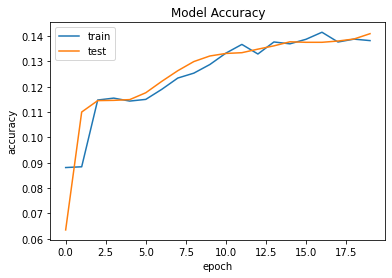

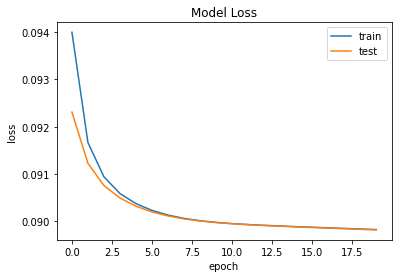

Time:  21.193744865999975 seconds


In [15]:
# 1η Δοκιμή Νευρωνικού Δικτύου! (Batch Size=256)

# Αρχή Χρονομέτρησης
start = timeit.default_timer()

# Σειριακό μοντέλο Νευρωνικού Δικτύου
model = Sequential()
# Kρυφό Eπίπεδο με 256 νευρώνες, 784 διαστάσεις & σιγμοειδή συνάρτηση ενεργοποίησης
# Dense = Full Connected (Άρα όλοι οι νευρώνες συνδέονται με όλους)
model.add(Dense(256, input_dim=(784), activation='sigmoid'))
# Ακόμα ένα Kρυφό Eπίπεδο με 256 νευρώνες, 784 διαστάσεις & σιγμοειδή συνάρτηση ενεργοποίησης
model.add(Dense(256, input_dim=(784), activation='sigmoid'))
# Επίπεδο Εξόδου με 10 (λόγω των χειρόγραφων ψηφίων) νευρώνες με softmax συνάρτηση ενεργοποίησης
model.add(Dense(10, activation='softmax'))

# Βελτιστοποιητής: Στοχαστική Επικλινής Κάθοδος και Σφάλμα: L2 (Μέσο Τετραγωνικό Σφάλμα)
model.compile(optimizer='sgd', loss='mean_squared_error', metrics=['accuracy'])

# 256 Δείγματα ανα επανάληψη σε 20 εποχές με verbose=1 (για να εμφανίζει τις εποχές!)
results = model.fit(train_data, train_labels, batch_size=256, epochs=20, verbose=1, validation_data=(test_data, test_labels))

# Εμφάνιση αποτελεσμάτων σε 2 Γραφήματα
# Για το accuracy
plt.plot(results.history['accuracy'])
plt.plot(results.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()
# Για το loss
plt.plot(results.history['loss'])
plt.plot(results.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

# Τέλος Χρονομέτρησης
stop = timeit.default_timer()
print('Time: ', stop - start, 'seconds')


<u>Σχόλια για την αύξηση του αριθμού του Batch Size</u>: **ΔΕΝ** παρατηρούμε κάποια ουσιαστική βελτιστοποίηση στις προβλέψεις. Ωστόσο, παρατηρούμε μια σημαντική βελτίωση ως προς τον χρόνο, οπότε ας δοκιμάσουμε να αυξήσουμε κι άλλο τον αριθμό του Batch Size!

Epoch 1/20
118/118 [==============================] - 1s 5ms/step - loss: 0.0950 - accuracy: 0.0949 - val_loss: 0.0944 - val_accuracy: 0.0906
Epoch 2/20
118/118 [==============================] - 0s 4ms/step - loss: 0.0939 - accuracy: 0.0947 - val_loss: 0.0935 - val_accuracy: 0.0897
Epoch 3/20
118/118 [==============================] - 0s 4ms/step - loss: 0.0931 - accuracy: 0.0962 - val_loss: 0.0929 - val_accuracy: 0.0894
Epoch 4/20
118/118 [==============================] - 0s 4ms/step - loss: 0.0926 - accuracy: 0.0971 - val_loss: 0.0924 - val_accuracy: 0.0931
Epoch 5/20
118/118 [==============================] - 0s 4ms/step - loss: 0.0922 - accuracy: 0.0975 - val_loss: 0.0920 - val_accuracy: 0.0935
Epoch 6/20
118/118 [==============================] - 0s 4ms/step - loss: 0.0919 - accuracy: 0.0978 - val_loss: 0.0918 - val_accuracy: 0.0946
Epoch 7/20
118/118 [==============================] - 0s 4ms/step - loss: 0.0917 - accuracy: 0.1001 - val_loss: 0.0916 - val_accuracy: 0.0966
Epoch 

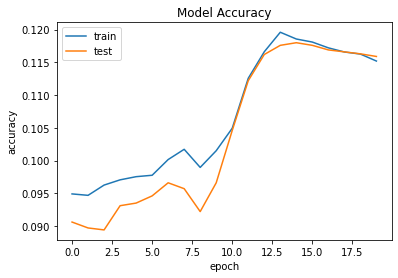

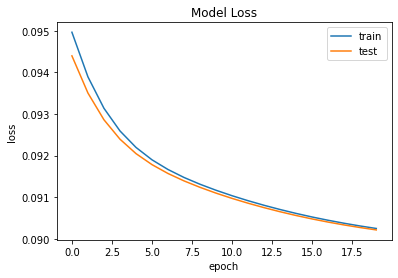

Time:  10.936742210999967 seconds


In [16]:
# 2η Δοκιμή Νευρωνικού Δικτύου! (Batch Size=512)

# Αρχή Χρονομέτρησης
start = timeit.default_timer()

# Σειριακό μοντέλο Νευρωνικού Δικτύου
model = Sequential()
# Kρυφό Eπίπεδο με 256 νευρώνες, 784 διαστάσεις & σιγμοειδή συνάρτηση ενεργοποίησης
# Dense = Full Connected (Άρα όλοι οι νευρώνες συνδέονται με όλους)
model.add(Dense(256, input_dim=(784), activation='sigmoid'))
# Ακόμα ένα Kρυφό Eπίπεδο με 256 νευρώνες, 784 διαστάσεις & σιγμοειδή συνάρτηση ενεργοποίησης
model.add(Dense(256, input_dim=(784), activation='sigmoid'))
# Επίπεδο Εξόδου με 10 (λόγω των χειρόγραφων ψηφίων) νευρώνες με softmax συνάρτηση ενεργοποίησης
model.add(Dense(10, activation='softmax'))

# Βελτιστοποιητής: Στοχαστική Επικλινής Κάθοδος και Σφάλμα: L2 (Μέσο Τετραγωνικό Σφάλμα)
model.compile(optimizer='sgd', loss='mean_squared_error', metrics=['accuracy'])

# 512 Δείγματα ανα επανάληψη σε 20 εποχές με verbose=1 (για να εμφανίζει τις εποχές!)
results = model.fit(train_data, train_labels, batch_size=512, epochs=20, verbose=1, validation_data=(test_data, test_labels))

# Εμφάνιση αποτελεσμάτων σε 2 Γραφήματα
# Για το accuracy
plt.plot(results.history['accuracy'])
plt.plot(results.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()
# Για το loss
plt.plot(results.history['loss'])
plt.plot(results.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

# Τέλος Χρονομέτρησης
stop = timeit.default_timer()
print('Time: ', stop - start, 'seconds')


Epoch 1/20
59/59 [==============================] - 1s 8ms/step - loss: 0.0924 - accuracy: 0.0976 - val_loss: 0.0923 - val_accuracy: 0.0992
Epoch 2/20
59/59 [==============================] - 0s 5ms/step - loss: 0.0920 - accuracy: 0.0993 - val_loss: 0.0919 - val_accuracy: 0.1010
Epoch 3/20
59/59 [==============================] - 0s 5ms/step - loss: 0.0917 - accuracy: 0.1018 - val_loss: 0.0916 - val_accuracy: 0.1019
Epoch 4/20
59/59 [==============================] - 0s 5ms/step - loss: 0.0915 - accuracy: 0.1046 - val_loss: 0.0914 - val_accuracy: 0.1033
Epoch 5/20
59/59 [==============================] - 0s 5ms/step - loss: 0.0913 - accuracy: 0.1041 - val_loss: 0.0912 - val_accuracy: 0.1023
Epoch 6/20
59/59 [==============================] - 0s 5ms/step - loss: 0.0911 - accuracy: 0.0992 - val_loss: 0.0911 - val_accuracy: 0.0973
Epoch 7/20
59/59 [==============================] - 0s 5ms/step - loss: 0.0910 - accuracy: 0.0922 - val_loss: 0.0909 - val_accuracy: 0.0895
Epoch 8/20
59/59 [==

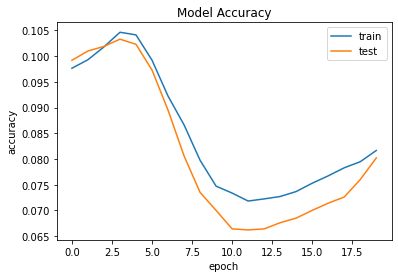

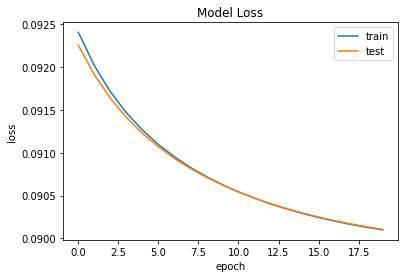

Time:  7.112398548999977 seconds


In [17]:
# 3η Δοκιμή Νευρωνικού Δικτύου! (Batch Size=1024)

# Αρχή Χρονομέτρησης
start = timeit.default_timer()

# Σειριακό μοντέλο Νευρωνικού Δικτύου
model = Sequential()
# Kρυφό Eπίπεδο με 256 νευρώνες, 784 διαστάσεις & σιγμοειδή συνάρτηση ενεργοποίησης
# Dense = Full Connected (Άρα όλοι οι νευρώνες συνδέονται με όλους)
model.add(Dense(256, input_dim=(784), activation='sigmoid'))
# Ακόμα ένα Kρυφό Eπίπεδο με 256 νευρώνες, 784 διαστάσεις & σιγμοειδή συνάρτηση ενεργοποίησης
model.add(Dense(256, input_dim=(784), activation='sigmoid'))
# Επίπεδο Εξόδου με 10 (λόγω των χειρόγραφων ψηφίων) νευρώνες με softmax συνάρτηση ενεργοποίησης
model.add(Dense(10, activation='softmax'))

# Βελτιστοποιητής: Στοχαστική Επικλινής Κάθοδος και Σφάλμα: L2 (Μέσο Τετραγωνικό Σφάλμα)
model.compile(optimizer='sgd', loss='mean_squared_error', metrics=['accuracy'])

# 1024 Δείγματα ανα επανάληψη σε 20 εποχές με verbose=1 (για να εμφανίζει τις εποχές!)
results = model.fit(train_data, train_labels, batch_size=1024, epochs=20, verbose=1, validation_data=(test_data, test_labels))

# Εμφάνιση αποτελεσμάτων σε 2 Γραφήματα
# Για το accuracy
plt.plot(results.history['accuracy'])
plt.plot(results.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()
# Για το loss
plt.plot(results.history['loss'])
plt.plot(results.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

# Τέλος Χρονομέτρησης
stop = timeit.default_timer()
print('Time: ', stop - start, 'seconds')

Epoch 1/20
30/30 [==============================] - 1s 12ms/step - loss: 0.0925 - accuracy: 0.0987 - val_loss: 0.0924 - val_accuracy: 0.0980
Epoch 2/20
30/30 [==============================] - 0s 7ms/step - loss: 0.0922 - accuracy: 0.0986 - val_loss: 0.0921 - val_accuracy: 0.0975
Epoch 3/20
30/30 [==============================] - 0s 6ms/step - loss: 0.0920 - accuracy: 0.0982 - val_loss: 0.0919 - val_accuracy: 0.0974
Epoch 4/20
30/30 [==============================] - 0s 7ms/step - loss: 0.0918 - accuracy: 0.0970 - val_loss: 0.0918 - val_accuracy: 0.0936
Epoch 5/20
30/30 [==============================] - 0s 6ms/step - loss: 0.0917 - accuracy: 0.0946 - val_loss: 0.0916 - val_accuracy: 0.0913
Epoch 6/20
30/30 [==============================] - 0s 8ms/step - loss: 0.0915 - accuracy: 0.0916 - val_loss: 0.0915 - val_accuracy: 0.0889
Epoch 7/20
30/30 [==============================] - 0s 8ms/step - loss: 0.0914 - accuracy: 0.0886 - val_loss: 0.0914 - val_accuracy: 0.0844
Epoch 8/20
30/30 [=

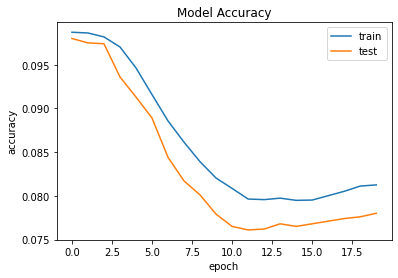

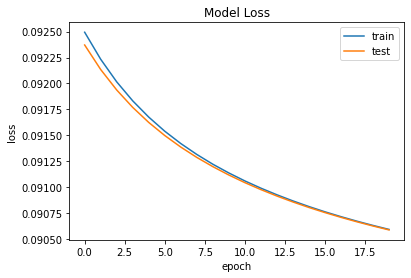

Time:  5.380355511999994 seconds


In [18]:
# 4η Δοκιμή Νευρωνικού Δικτύου! (Batch Size=2048)

# Αρχή Χρονομέτρησης
start = timeit.default_timer()

# Σειριακό μοντέλο Νευρωνικού Δικτύου
model = Sequential()
# Kρυφό Eπίπεδο με 256 νευρώνες, 784 διαστάσεις & σιγμοειδή συνάρτηση ενεργοποίησης
# Dense = Full Connected (Άρα όλοι οι νευρώνες συνδέονται με όλους)
model.add(Dense(256, input_dim=(784), activation='sigmoid'))
# Ακόμα ένα Kρυφό Eπίπεδο με 256 νευρώνες, 784 διαστάσεις & σιγμοειδή συνάρτηση ενεργοποίησης
model.add(Dense(256, input_dim=(784), activation='sigmoid'))
# Επίπεδο Εξόδου με 10 (λόγω των χειρόγραφων ψηφίων) νευρώνες με softmax συνάρτηση ενεργοποίησης
model.add(Dense(10, activation='softmax'))

# Βελτιστοποιητής: Στοχαστική Επικλινής Κάθοδος και Σφάλμα: L2 (Μέσο Τετραγωνικό Σφάλμα)
model.compile(optimizer='sgd', loss='mean_squared_error', metrics=['accuracy'])

# 2048 Δείγματα ανα επανάληψη σε 20 εποχές με verbose=1 (για να εμφανίζει τις εποχές!)
results = model.fit(train_data, train_labels, batch_size=2048, epochs=20, verbose=1, validation_data=(test_data, test_labels))

# Εμφάνιση αποτελεσμάτων σε 2 Γραφήματα
# Για το accuracy
plt.plot(results.history['accuracy'])
plt.plot(results.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()
# Για το loss
plt.plot(results.history['loss'])
plt.plot(results.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

# Τέλος Χρονομέτρησης
stop = timeit.default_timer()
print('Time: ', stop - start, 'seconds')

<u>Σχόλια για την αύξηση του αριθμού του Batch Size</u>: Παρατηρούμε ότι με την αύξηση του αριθμού του Batch Size μειώνεται δραματικά ο χρόνος **ΑΛΛΑ** χάνουμε στην ακρίβεια των προβλέψεων μας!

## 2.3 Αλλαγή της συνάρτησης Ενεργοποίησης, **ΕΚΤΟΣ** από το επίπεδο εξόδου (Sigmoid/ReLU/SoftMax).

Epoch 1/20
469/469 [==============================] - 2s 4ms/step - loss: 0.0901 - accuracy: 0.1042 - val_loss: 0.0894 - val_accuracy: 0.1453
Epoch 2/20
469/469 [==============================] - 1s 3ms/step - loss: 0.0887 - accuracy: 0.1757 - val_loss: 0.0880 - val_accuracy: 0.2106
Epoch 3/20
469/469 [==============================] - 2s 3ms/step - loss: 0.0873 - accuracy: 0.2441 - val_loss: 0.0865 - val_accuracy: 0.2761
Epoch 4/20
469/469 [==============================] - 2s 3ms/step - loss: 0.0857 - accuracy: 0.3135 - val_loss: 0.0847 - val_accuracy: 0.3515
Epoch 5/20
469/469 [==============================] - 1s 3ms/step - loss: 0.0838 - accuracy: 0.3878 - val_loss: 0.0826 - val_accuracy: 0.4267
Epoch 6/20
469/469 [==============================] - 1s 3ms/step - loss: 0.0816 - accuracy: 0.4555 - val_loss: 0.0802 - val_accuracy: 0.4875
Epoch 7/20
469/469 [==============================] - 1s 3ms/step - loss: 0.0791 - accuracy: 0.5135 - val_loss: 0.0774 - val_accuracy: 0.5411
Epoch 

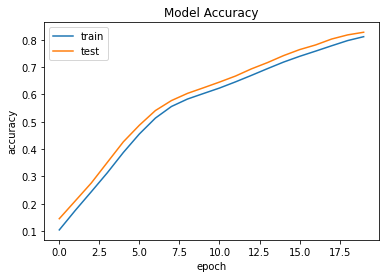

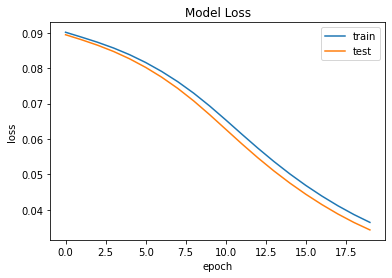

Time:  41.889462753999965 seconds


In [19]:
# 1η Δοκιμή Νευρωνικού Δικτύου! (με συνάρτηση ενεργοποίησης την ReLU)

# Αρχή Χρονομέτρησης
start = timeit.default_timer()

# Σειριακό μοντέλο Νευρωνικού Δικτύου
model = Sequential()
# Kρυφό Eπίπεδο με 256 νευρώνες, 784 διαστάσεις & ReLU συνάρτηση ενεργοποίησης
# Dense = Full Connected (Άρα όλοι οι νευρώνες συνδέονται με όλους)
model.add(Dense(256, input_dim=(784), activation='relu'))
# Ακόμα ένα Kρυφό Eπίπεδο με 256 νευρώνες, 784 διαστάσεις & ReLU συνάρτηση ενεργοποίησης
model.add(Dense(256, input_dim=(784), activation='relu'))
# Επίπεδο Εξόδου με 10 (λόγω των χειρόγραφων ψηφίων) νευρώνες με softmax συνάρτηση ενεργοποίησης
model.add(Dense(10, activation='softmax'))

# Βελτιστοποιητής: Στοχαστική Επικλινής Κάθοδος και Σφάλμα: L2 (Μέσο Τετραγωνικό Σφάλμα)
model.compile(optimizer='sgd', loss='mean_squared_error', metrics=['accuracy'])

# 128 Δείγματα ανα επανάληψη σε 20 εποχές με verbose=1 (για να εμφανίζει τις εποχές!)
results = model.fit(train_data, train_labels, batch_size=128, epochs=20, verbose=1, validation_data=(test_data, test_labels))

# Εμφάνιση αποτελεσμάτων σε 2 Γραφήματα
# Για το accuracy
plt.plot(results.history['accuracy'])
plt.plot(results.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()
# Για το loss
plt.plot(results.history['loss'])
plt.plot(results.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

# Τέλος Χρονομέτρησης
stop = timeit.default_timer()
print('Time: ', stop - start, 'seconds')


<u>Σχόλια για την ReLU</u>: Παρατηρούμε ότι με την αλλαγή της συνάρτησης ενεργοποίησης αλλάζουν δραματικά οι προβλέψεις μας (προς το καλύτερο). Οπότε καταλαβαίνουμε ότι η ReLU είναι καλύτερη για τις προβλέψεις του DataSet μας (*MNIST*) από την σιγμοειδή συνάρτηση!

## 2.4 Αλλαγή του Βελτιστοποιητή (SGD/Adam/Adamax/NAdam).

Epoch 1/20
469/469 [==============================] - 2s 3ms/step - loss: 0.0925 - accuracy: 0.1155 - val_loss: 0.0913 - val_accuracy: 0.1492
Epoch 2/20
469/469 [==============================] - 1s 3ms/step - loss: 0.0908 - accuracy: 0.1583 - val_loss: 0.0905 - val_accuracy: 0.1578
Epoch 3/20
469/469 [==============================] - 1s 3ms/step - loss: 0.0903 - accuracy: 0.1587 - val_loss: 0.0902 - val_accuracy: 0.1556
Epoch 4/20
469/469 [==============================] - 2s 3ms/step - loss: 0.0901 - accuracy: 0.1539 - val_loss: 0.0900 - val_accuracy: 0.1450
Epoch 5/20
469/469 [==============================] - 1s 3ms/step - loss: 0.0899 - accuracy: 0.1456 - val_loss: 0.0899 - val_accuracy: 0.1424
Epoch 6/20
469/469 [==============================] - 2s 4ms/step - loss: 0.0898 - accuracy: 0.1468 - val_loss: 0.0897 - val_accuracy: 0.1421
Epoch 7/20
469/469 [==============================] - 1s 3ms/step - loss: 0.0897 - accuracy: 0.1433 - val_loss: 0.0896 - val_accuracy: 0.1455
Epoch 

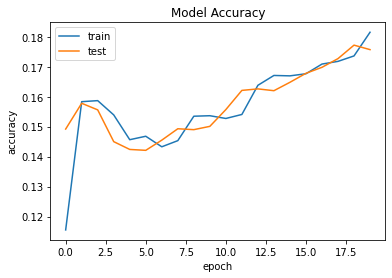

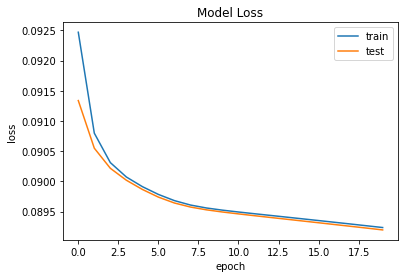

Time:  41.702790023000034 seconds


In [20]:
# 1η Δοκιμή Νευρωνικού Δικτύου! (με SGD)

# Αρχή Χρονομέτρησης
start = timeit.default_timer()

# Σειριακό μοντέλο Νευρωνικού Δικτύου
model = Sequential()
# Kρυφό Eπίπεδο με 256 νευρώνες, 784 διαστάσεις & σιγμοειδή συνάρτηση ενεργοποίησης
# Dense = Full Connected (Άρα όλοι οι νευρώνες συνδέονται με όλους)
model.add(Dense(256, input_dim=(784), activation='sigmoid'))
# Ακόμα ένα Kρυφό Eπίπεδο με 256 νευρώνες, 784 διαστάσεις & σιγμοειδή συνάρτηση ενεργοποίησης
model.add(Dense(256, input_dim=(784), activation='sigmoid'))
# Επίπεδο Εξόδου με 10 (λόγω των χειρόγραφων ψηφίων) νευρώνες με softmax συνάρτηση ενεργοποίησης
model.add(Dense(10, activation='softmax'))

# Βελτιστοποιητής: Στοχαστική Επικλινής Κάθοδος και Σφάλμα: L2 (Μέσο Τετραγωνικό Σφάλμα)
model.compile(optimizer='sgd', loss='mean_squared_error', metrics=['accuracy'])

# 128 Δείγματα ανα επανάληψη σε 20 εποχές με verbose=1 (για να εμφανίζει τις εποχές!)
results = model.fit(train_data, train_labels, batch_size=128, epochs=20, verbose=1, validation_data=(test_data, test_labels))

# Εμφάνιση αποτελεσμάτων σε 2 Γραφήματα
# Για το accuracy
plt.plot(results.history['accuracy'])
plt.plot(results.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()
# Για το loss
plt.plot(results.history['loss'])
plt.plot(results.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

# Τέλος Χρονομέτρησης
stop = timeit.default_timer()
print('Time: ', stop - start, 'seconds')


Epoch 1/20
469/469 [==============================] - 3s 5ms/step - loss: 0.0252 - accuracy: 0.8303 - val_loss: 0.0122 - val_accuracy: 0.9196
Epoch 2/20
469/469 [==============================] - 2s 3ms/step - loss: 0.0103 - accuracy: 0.9343 - val_loss: 0.0089 - val_accuracy: 0.9430
Epoch 3/20
469/469 [==============================] - 2s 3ms/step - loss: 0.0079 - accuracy: 0.9498 - val_loss: 0.0070 - val_accuracy: 0.9554
Epoch 4/20
469/469 [==============================] - 2s 3ms/step - loss: 0.0064 - accuracy: 0.9590 - val_loss: 0.0065 - val_accuracy: 0.9577
Epoch 5/20
469/469 [==============================] - 1s 3ms/step - loss: 0.0053 - accuracy: 0.9665 - val_loss: 0.0055 - val_accuracy: 0.9646
Epoch 6/20
469/469 [==============================] - 2s 3ms/step - loss: 0.0045 - accuracy: 0.9727 - val_loss: 0.0054 - val_accuracy: 0.9655
Epoch 7/20
469/469 [==============================] - 2s 3ms/step - loss: 0.0039 - accuracy: 0.9766 - val_loss: 0.0046 - val_accuracy: 0.9702
Epoch 

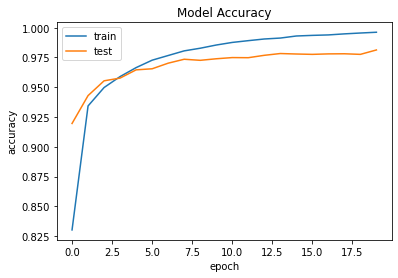

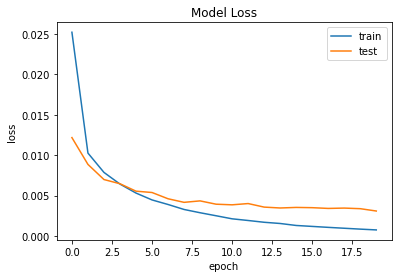

Time:  41.790062556000066 seconds


In [21]:
# 2η Δοκιμή Νευρωνικού Δικτύου! (με Adam)

# Αρχή Χρονομέτρησης
start = timeit.default_timer()

# Σειριακό μοντέλο Νευρωνικού Δικτύου
model = Sequential()
# Kρυφό Eπίπεδο με 256 νευρώνες, 784 διαστάσεις & σιγμοειδή συνάρτηση ενεργοποίησης
# Dense = Full Connected (Άρα όλοι οι νευρώνες συνδέονται με όλους)
model.add(Dense(256, input_dim=(784), activation='sigmoid'))
# Ακόμα ένα Kρυφό Eπίπεδο με 256 νευρώνες, 784 διαστάσεις & σιγμοειδή συνάρτηση ενεργοποίησης
model.add(Dense(256, input_dim=(784), activation='sigmoid'))
# Επίπεδο Εξόδου με 10 (λόγω των χειρόγραφων ψηφίων) νευρώνες με softmax συνάρτηση ενεργοποίησης
model.add(Dense(10, activation='softmax'))

# Βελτιστοποιητής: Adam Κάθοδος και Σφάλμα: L2 (Μέσο Τετραγωνικό Σφάλμα)
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])

# 128 Δείγματα ανα επανάληψη σε 20 εποχές με verbose=1 (για να εμφανίζει τις εποχές!)
results = model.fit(train_data, train_labels, batch_size=128, epochs=20, verbose=1, validation_data=(test_data, test_labels))

# Εμφάνιση αποτελεσμάτων σε 2 Γραφήματα
# Για το accuracy
plt.plot(results.history['accuracy'])
plt.plot(results.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()
# Για το loss
plt.plot(results.history['loss'])
plt.plot(results.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

# Τέλος Χρονομέτρησης
stop = timeit.default_timer()
print('Time: ', stop - start, 'seconds')


Epoch 1/20
469/469 [==============================] - 2s 4ms/step - loss: 0.0379 - accuracy: 0.7541 - val_loss: 0.0163 - val_accuracy: 0.9050
Epoch 2/20
469/469 [==============================] - 2s 3ms/step - loss: 0.0145 - accuracy: 0.9097 - val_loss: 0.0122 - val_accuracy: 0.9220
Epoch 3/20
469/469 [==============================] - 2s 3ms/step - loss: 0.0120 - accuracy: 0.9231 - val_loss: 0.0108 - val_accuracy: 0.9301
Epoch 4/20
469/469 [==============================] - 2s 3ms/step - loss: 0.0106 - accuracy: 0.9317 - val_loss: 0.0099 - val_accuracy: 0.9369
Epoch 5/20
469/469 [==============================] - 2s 3ms/step - loss: 0.0096 - accuracy: 0.9386 - val_loss: 0.0091 - val_accuracy: 0.9412
Epoch 6/20
469/469 [==============================] - 2s 3ms/step - loss: 0.0088 - accuracy: 0.9440 - val_loss: 0.0084 - val_accuracy: 0.9465
Epoch 7/20
469/469 [==============================] - 2s 4ms/step - loss: 0.0080 - accuracy: 0.9495 - val_loss: 0.0079 - val_accuracy: 0.9484
Epoch 

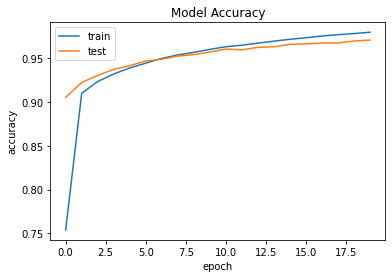

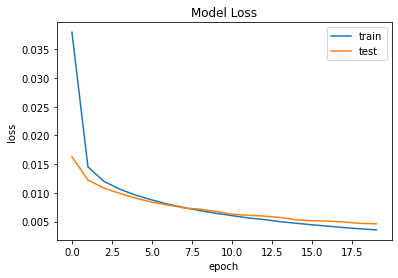

Time:  41.70913383100003 seconds


In [22]:
# 3η Δοκιμή Νευρωνικού Δικτύου! (με Adamax)

# Αρχή Χρονομέτρησης
start = timeit.default_timer()

# Σειριακό μοντέλο Νευρωνικού Δικτύου
model = Sequential()
# Kρυφό Eπίπεδο με 256 νευρώνες, 784 διαστάσεις & σιγμοειδή συνάρτηση ενεργοποίησης
# Dense = Full Connected (Άρα όλοι οι νευρώνες συνδέονται με όλους)
model.add(Dense(256, input_dim=(784), activation='sigmoid'))
# Ακόμα ένα Kρυφό Eπίπεδο με 256 νευρώνες, 784 διαστάσεις & σιγμοειδή συνάρτηση ενεργοποίησης
model.add(Dense(256, input_dim=(784), activation='sigmoid'))
# Επίπεδο Εξόδου με 10 (λόγω των χειρόγραφων ψηφίων) νευρώνες με softmax συνάρτηση ενεργοποίησης
model.add(Dense(10, activation='softmax'))

# Βελτιστοποιητής: Adamax και Σφάλμα: L2 (Μέσο Τετραγωνικό Σφάλμα)
model.compile(optimizer='adamax', loss='mean_squared_error', metrics=['accuracy'])

# 128 Δείγματα ανα επανάληψη σε 20 εποχές με verbose=1 (για να εμφανίζει τις εποχές!)
results = model.fit(train_data, train_labels, batch_size=128, epochs=20, verbose=1, validation_data=(test_data, test_labels))

# Εμφάνιση αποτελεσμάτων σε 2 Γραφήματα
# Για το accuracy
plt.plot(results.history['accuracy'])
plt.plot(results.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()
# Για το loss
plt.plot(results.history['loss'])
plt.plot(results.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

# Τέλος Χρονομέτρησης
stop = timeit.default_timer()
print('Time: ', stop - start, 'seconds')


Epoch 1/20
469/469 [==============================] - 3s 5ms/step - loss: 0.0247 - accuracy: 0.8363 - val_loss: 0.0114 - val_accuracy: 0.9266
Epoch 2/20
469/469 [==============================] - 2s 4ms/step - loss: 0.0102 - accuracy: 0.9345 - val_loss: 0.0085 - val_accuracy: 0.9459
Epoch 3/20
469/469 [==============================] - 2s 5ms/step - loss: 0.0079 - accuracy: 0.9499 - val_loss: 0.0073 - val_accuracy: 0.9530
Epoch 4/20
469/469 [==============================] - 2s 5ms/step - loss: 0.0064 - accuracy: 0.9593 - val_loss: 0.0062 - val_accuracy: 0.9599
Epoch 5/20
469/469 [==============================] - 2s 4ms/step - loss: 0.0053 - accuracy: 0.9673 - val_loss: 0.0055 - val_accuracy: 0.9642
Epoch 6/20
469/469 [==============================] - 2s 4ms/step - loss: 0.0044 - accuracy: 0.9730 - val_loss: 0.0049 - val_accuracy: 0.9686
Epoch 7/20
469/469 [==============================] - 2s 4ms/step - loss: 0.0038 - accuracy: 0.9770 - val_loss: 0.0048 - val_accuracy: 0.9687
Epoch 

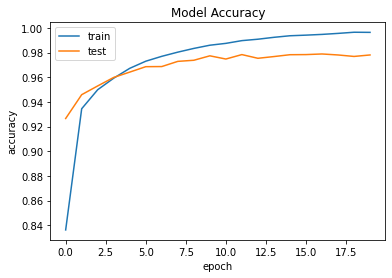

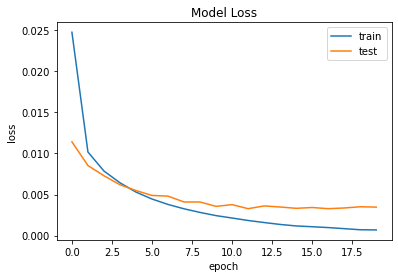

Time:  42.27983169799995 seconds


In [23]:
# 4η Δοκιμή Νευρωνικού Δικτύου! (με NAdam)

# Αρχή Χρονομέτρησης
start = timeit.default_timer()

# Σειριακό μοντέλο Νευρωνικού Δικτύου
model = Sequential()
# Kρυφό Eπίπεδο με 256 νευρώνες, 784 διαστάσεις & σιγμοειδή συνάρτηση ενεργοποίησης
# Dense = Full Connected (Άρα όλοι οι νευρώνες συνδέονται με όλους)
model.add(Dense(256, input_dim=(784), activation='sigmoid'))
# Ακόμα ένα Kρυφό Eπίπεδο με 256 νευρώνες, 784 διαστάσεις & σιγμοειδή συνάρτηση ενεργοποίησης
model.add(Dense(256, input_dim=(784), activation='sigmoid'))
# Επίπεδο Εξόδου με 10 (λόγω των χειρόγραφων ψηφίων) νευρώνες με softmax συνάρτηση ενεργοποίησης
model.add(Dense(10, activation='softmax'))

# Βελτιστοποιητής: NAdam και Σφάλμα: L2 (Μέσο Τετραγωνικό Σφάλμα)
model.compile(optimizer='nadam', loss='mean_squared_error', metrics=['accuracy'])

# 128 Δείγματα ανα επανάληψη σε 20 εποχές με verbose=1 (για να εμφανίζει τις εποχές!)
results = model.fit(train_data, train_labels, batch_size=128, epochs=20, verbose=1, validation_data=(test_data, test_labels))

# Εμφάνιση αποτελεσμάτων σε 2 Γραφήματα
# Για το accuracy
plt.plot(results.history['accuracy'])
plt.plot(results.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()
# Για το loss
plt.plot(results.history['loss'])
plt.plot(results.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

# Τέλος Χρονομέτρησης
stop = timeit.default_timer()
print('Time: ', stop - start, 'seconds')


<u>Σχόλια για τους *Βελτιστοποιητές* (Optimizers)</u>: Παρατηρούμε πως ο καλύτερος είναι ο **Adam**,αμέσως μετά οι **Adamax** και **NAdam** και τελευταίος (με διαφορά) ο **SGD**

## 2.5 Αλλαγή του Σφάλματος (Mean Squared Error/Poisson/Mean Absolute Error/Categorical Crossentropy)

Epoch 1/20
469/469 [==============================] - 2s 3ms/step - loss: 0.0921 - accuracy: 0.1045 - val_loss: 0.0911 - val_accuracy: 0.1324
Epoch 2/20
469/469 [==============================] - 2s 3ms/step - loss: 0.0907 - accuracy: 0.1386 - val_loss: 0.0904 - val_accuracy: 0.1495
Epoch 3/20
469/469 [==============================] - 1s 3ms/step - loss: 0.0903 - accuracy: 0.1475 - val_loss: 0.0902 - val_accuracy: 0.1359
Epoch 4/20
469/469 [==============================] - 2s 3ms/step - loss: 0.0901 - accuracy: 0.1265 - val_loss: 0.0900 - val_accuracy: 0.1178
Epoch 5/20
469/469 [==============================] - 2s 3ms/step - loss: 0.0900 - accuracy: 0.1150 - val_loss: 0.0899 - val_accuracy: 0.1161
Epoch 6/20
469/469 [==============================] - 1s 3ms/step - loss: 0.0899 - accuracy: 0.1145 - val_loss: 0.0898 - val_accuracy: 0.1152
Epoch 7/20
469/469 [==============================] - 1s 3ms/step - loss: 0.0898 - accuracy: 0.1136 - val_loss: 0.0898 - val_accuracy: 0.1146
Epoch 

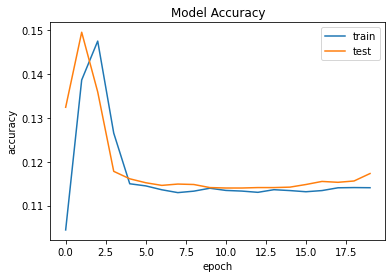

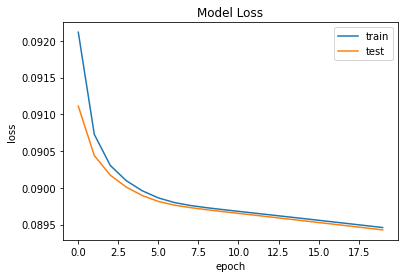

Time:  41.64526742199996 seconds


In [24]:
# 1η Δοκιμή Νευρωνικού Δικτύου! (με Mean Squared Error)

# Αρχή Χρονομέτρησης
start = timeit.default_timer()

# Σειριακό μοντέλο Νευρωνικού Δικτύου
model = Sequential()
# Kρυφό Eπίπεδο με 256 νευρώνες, 784 διαστάσεις & σιγμοειδή συνάρτηση ενεργοποίησης
# Dense = Full Connected (Άρα όλοι οι νευρώνες συνδέονται με όλους)
model.add(Dense(256, input_dim=(784), activation='sigmoid'))
# Ακόμα ένα Kρυφό Eπίπεδο με 256 νευρώνες, 784 διαστάσεις & σιγμοειδή συνάρτηση ενεργοποίησης
model.add(Dense(256, input_dim=(784), activation='sigmoid'))
# Επίπεδο Εξόδου με 10 (λόγω των χειρόγραφων ψηφίων) νευρώνες με softmax συνάρτηση ενεργοποίησης
model.add(Dense(10, activation='softmax'))

# Βελτιστοποιητής: Στοχαστική Επικλινής Κάθοδος και Σφάλμα: L2 (Μέσο Τετραγωνικό Σφάλμα)
model.compile(optimizer='sgd', loss='mean_squared_error', metrics=['accuracy'])

# 128 Δείγματα ανα επανάληψη σε 20 εποχές με verbose=1 (για να εμφανίζει τις εποχές!)
results = model.fit(train_data, train_labels, batch_size=128, epochs=20, verbose=1, validation_data=(test_data, test_labels))

# Εμφάνιση αποτελεσμάτων σε 2 Γραφήματα
# Για το accuracy
plt.plot(results.history['accuracy'])
plt.plot(results.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()
# Για το loss
plt.plot(results.history['loss'])
plt.plot(results.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

# Τέλος Χρονομέτρησης
stop = timeit.default_timer()
print('Time: ', stop - start, 'seconds')


Epoch 1/20
469/469 [==============================] - 2s 4ms/step - loss: 0.3323 - accuracy: 0.1159 - val_loss: 0.3292 - val_accuracy: 0.1159
Epoch 2/20
469/469 [==============================] - 2s 4ms/step - loss: 0.3291 - accuracy: 0.1160 - val_loss: 0.3286 - val_accuracy: 0.1293
Epoch 3/20
469/469 [==============================] - 1s 3ms/step - loss: 0.3285 - accuracy: 0.1242 - val_loss: 0.3280 - val_accuracy: 0.1308
Epoch 4/20
469/469 [==============================] - 2s 3ms/step - loss: 0.3279 - accuracy: 0.1280 - val_loss: 0.3274 - val_accuracy: 0.1661
Epoch 5/20
469/469 [==============================] - 1s 3ms/step - loss: 0.3273 - accuracy: 0.1576 - val_loss: 0.3268 - val_accuracy: 0.1503
Epoch 6/20
469/469 [==============================] - 1s 3ms/step - loss: 0.3267 - accuracy: 0.1712 - val_loss: 0.3262 - val_accuracy: 0.1673
Epoch 7/20
469/469 [==============================] - 1s 3ms/step - loss: 0.3261 - accuracy: 0.1816 - val_loss: 0.3256 - val_accuracy: 0.2774
Epoch 

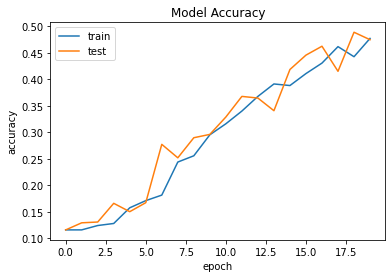

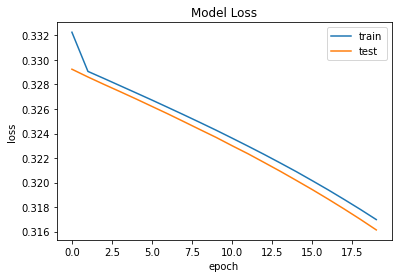

Time:  41.66569488899995 seconds


In [25]:
# 2η Δοκιμή Νευρωνικού Δικτύου! (με Poisson)

# Αρχή Χρονομέτρησης
start = timeit.default_timer()

# Σειριακό μοντέλο Νευρωνικού Δικτύου
model = Sequential()
# Kρυφό Eπίπεδο με 256 νευρώνες, 784 διαστάσεις & σιγμοειδή συνάρτηση ενεργοποίησης
# Dense = Full Connected (Άρα όλοι οι νευρώνες συνδέονται με όλους)
model.add(Dense(256, input_dim=(784), activation='sigmoid'))
# Ακόμα ένα Kρυφό Eπίπεδο με 256 νευρώνες, 784 διαστάσεις & σιγμοειδή συνάρτηση ενεργοποίησης
model.add(Dense(256, input_dim=(784), activation='sigmoid'))
# Επίπεδο Εξόδου με 10 (λόγω των χειρόγραφων ψηφίων) νευρώνες με softmax συνάρτηση ενεργοποίησης
model.add(Dense(10, activation='softmax'))

# Βελτιστοποιητής: Στοχαστική Επικλινής Κάθοδος και Σφάλμα: Poisson
model.compile(optimizer='sgd', loss='poisson', metrics=['accuracy'])

# 128 Δείγματα ανα επανάληψη σε 20 εποχές με verbose=1 (για να εμφανίζει τις εποχές!)
results = model.fit(train_data, train_labels, batch_size=128, epochs=20, verbose=1, validation_data=(test_data, test_labels))

# Εμφάνιση αποτελεσμάτων σε 2 Γραφήματα
# Για το accuracy
plt.plot(results.history['accuracy'])
plt.plot(results.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()
# Για το loss
plt.plot(results.history['loss'])
plt.plot(results.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

# Τέλος Χρονομέτρησης
stop = timeit.default_timer()
print('Time: ', stop - start, 'seconds')


Epoch 1/20
469/469 [==============================] - 2s 4ms/step - loss: 0.1806 - accuracy: 0.0904 - val_loss: 0.1806 - val_accuracy: 0.0892
Epoch 2/20
469/469 [==============================] - 1s 3ms/step - loss: 0.1805 - accuracy: 0.0904 - val_loss: 0.1805 - val_accuracy: 0.0892
Epoch 3/20
469/469 [==============================] - 1s 3ms/step - loss: 0.1804 - accuracy: 0.0904 - val_loss: 0.1804 - val_accuracy: 0.0892
Epoch 4/20
469/469 [==============================] - 1s 3ms/step - loss: 0.1803 - accuracy: 0.0904 - val_loss: 0.1803 - val_accuracy: 0.0893
Epoch 5/20
469/469 [==============================] - 2s 3ms/step - loss: 0.1802 - accuracy: 0.0997 - val_loss: 0.1802 - val_accuracy: 0.1037
Epoch 6/20
469/469 [==============================] - 1s 3ms/step - loss: 0.1801 - accuracy: 0.0997 - val_loss: 0.1801 - val_accuracy: 0.0980
Epoch 7/20
469/469 [==============================] - 2s 3ms/step - loss: 0.1800 - accuracy: 0.0987 - val_loss: 0.1800 - val_accuracy: 0.0980
Epoch 

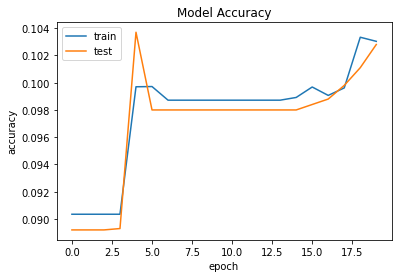

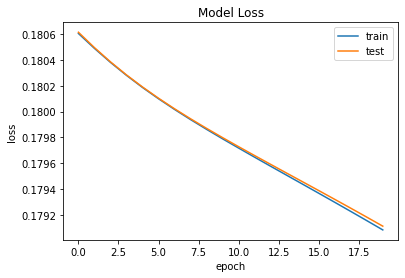

Time:  30.820194197999967 seconds


In [26]:
# 3η Δοκιμή Νευρωνικού Δικτύου! (με Mean Absolute Error)

# Αρχή Χρονομέτρησης
start = timeit.default_timer()

# Σειριακό μοντέλο Νευρωνικού Δικτύου
model = Sequential()
# Kρυφό Eπίπεδο με 256 νευρώνες, 784 διαστάσεις & σιγμοειδή συνάρτηση ενεργοποίησης
# Dense = Full Connected (Άρα όλοι οι νευρώνες συνδέονται με όλους)
model.add(Dense(256, input_dim=(784), activation='sigmoid'))
# Ακόμα ένα Kρυφό Eπίπεδο με 256 νευρώνες, 784 διαστάσεις & σιγμοειδή συνάρτηση ενεργοποίησης
model.add(Dense(256, input_dim=(784), activation='sigmoid'))
# Επίπεδο Εξόδου με 10 (λόγω των χειρόγραφων ψηφίων) νευρώνες με softmax συνάρτηση ενεργοποίησης
model.add(Dense(10, activation='softmax'))

# Βελτιστοποιητής: Στοχαστική Επικλινής Κάθοδος και Σφάλμα: Μέσο Απόλυτο Σφάλμα
model.compile(optimizer='sgd', loss='mean_absolute_error', metrics=['accuracy'])

# 128 Δείγματα ανα επανάληψη σε 20 εποχές με verbose=1 (για να εμφανίζει τις εποχές!)
results = model.fit(train_data, train_labels, batch_size=128, epochs=20, verbose=1, validation_data=(test_data, test_labels))

# Εμφάνιση αποτελεσμάτων σε 2 Γραφήματα
# Για το accuracy
plt.plot(results.history['accuracy'])
plt.plot(results.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()
# Για το loss
plt.plot(results.history['loss'])
plt.plot(results.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

# Τέλος Χρονομέτρησης
stop = timeit.default_timer()
print('Time: ', stop - start, 'seconds')


Epoch 1/20
469/469 [==============================] - 2s 4ms/step - loss: 2.2761 - accuracy: 0.1900 - val_loss: 2.2434 - val_accuracy: 0.3333
Epoch 2/20
469/469 [==============================] - 2s 3ms/step - loss: 2.2106 - accuracy: 0.3793 - val_loss: 2.1714 - val_accuracy: 0.4348
Epoch 3/20
469/469 [==============================] - 2s 3ms/step - loss: 2.1268 - accuracy: 0.4904 - val_loss: 2.0686 - val_accuracy: 0.5304
Epoch 4/20
469/469 [==============================] - 2s 4ms/step - loss: 2.0054 - accuracy: 0.5735 - val_loss: 1.9193 - val_accuracy: 0.6264
Epoch 5/20
469/469 [==============================] - 2s 3ms/step - loss: 1.8305 - accuracy: 0.6298 - val_loss: 1.7143 - val_accuracy: 0.6475
Epoch 6/20
469/469 [==============================] - 2s 4ms/step - loss: 1.6113 - accuracy: 0.6737 - val_loss: 1.4816 - val_accuracy: 0.6897
Epoch 7/20
469/469 [==============================] - 3s 6ms/step - loss: 1.3863 - accuracy: 0.7117 - val_loss: 1.2668 - val_accuracy: 0.7619
Epoch 

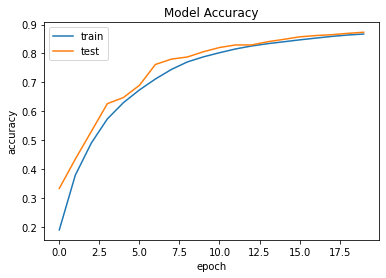

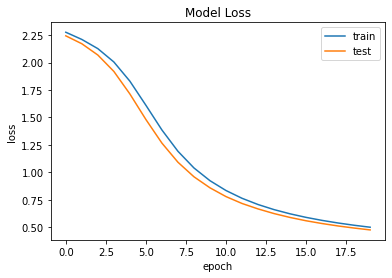

Time:  36.353709673000026 seconds


In [27]:
# 4η Δοκιμή Νευρωνικού Δικτύου! (με Categorical Crossentropy)

# Αρχή Χρονομέτρησης
start = timeit.default_timer()

# Σειριακό μοντέλο Νευρωνικού Δικτύου
model = Sequential()
# Kρυφό Eπίπεδο με 256 νευρώνες, 784 διαστάσεις & σιγμοειδή συνάρτηση ενεργοποίησης
# Dense = Full Connected (Άρα όλοι οι νευρώνες συνδέονται με όλους)
model.add(Dense(256, input_dim=(784), activation='sigmoid'))
# Ακόμα ένα Kρυφό Eπίπεδο με 256 νευρώνες, 784 διαστάσεις & σιγμοειδή συνάρτηση ενεργοποίησης
model.add(Dense(256, input_dim=(784), activation='sigmoid'))
# Επίπεδο Εξόδου με 10 (λόγω των χειρόγραφων ψηφίων) νευρώνες με softmax συνάρτηση ενεργοποίησης
model.add(Dense(10, activation='softmax'))

# Βελτιστοποιητής: Στοχαστική Επικλινής Κάθοδος και Σφάλμα: Categorical Crossentropy
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

# 128 Δείγματα ανα επανάληψη σε 20 εποχές με verbose=1 (για να εμφανίζει τις εποχές!)
results = model.fit(train_data, train_labels, batch_size=128, epochs=20, verbose=1, validation_data=(test_data, test_labels))

# Εμφάνιση αποτελεσμάτων σε 2 Γραφήματα
# Για το accuracy
plt.plot(results.history['accuracy'])
plt.plot(results.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()
# Για το loss
plt.plot(results.history['loss'])
plt.plot(results.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

# Τέλος Χρονομέτρησης
stop = timeit.default_timer()
print('Time: ', stop - start, 'seconds')


<u>Σχόλια για τα *Σφάλματα* (Losses)</u>: Παρατηρούμε πως το καλύτερο είναι το **Categorical Crossentropy** (το οποίο και διαλέξαμε στο πρότυπο μοντέλο). Τώρα θα ψάξουμε τα καλύτερα ως προς τις παραμέτρους που βρήκαμε και θα τα συνδυάσουμε!

# 3 Βέλτιστο Νευρωνικό Δίκτυο (σύμφωνα με τις παραμέτρους που ελένξαμε)

Από όλες τι δοκιμές που έκανα κατάλαβα πως οι καλύτεροι παράμετροι για το νευρωνικό μου δίκτυο είναι:α)τα ίδια *hidden layers* του πρότυπου νευρωνικού δικτύου, το **128 Batch Size** (ως προς το accuracy ΚΑΙ ΟΧΙ ως προς τον χρόνο), η συνάρτηση ενεργοποίησης της **ReLU** για τα *hidden layers*, ο **Adam** ως *Optimizer* και το **Categorical Crossentropy** ως *loss*! Παρακάτω τρέχω το νευρωνικό αυτό δίκτυο και βγάζω αποτελέσματα.

Epoch 1/20
469/469 [==============================] - 2s 4ms/step - loss: 0.2566 - accuracy: 0.9263 - val_loss: 0.1206 - val_accuracy: 0.9638
Epoch 2/20
469/469 [==============================] - 2s 4ms/step - loss: 0.0955 - accuracy: 0.9700 - val_loss: 0.0837 - val_accuracy: 0.9744
Epoch 3/20
469/469 [==============================] - 1s 3ms/step - loss: 0.0620 - accuracy: 0.9804 - val_loss: 0.0854 - val_accuracy: 0.9722
Epoch 4/20
469/469 [==============================] - 2s 4ms/step - loss: 0.0443 - accuracy: 0.9859 - val_loss: 0.0758 - val_accuracy: 0.9761
Epoch 5/20
469/469 [==============================] - 2s 3ms/step - loss: 0.0331 - accuracy: 0.9895 - val_loss: 0.0796 - val_accuracy: 0.9777
Epoch 6/20
469/469 [==============================] - 2s 3ms/step - loss: 0.0262 - accuracy: 0.9911 - val_loss: 0.0792 - val_accuracy: 0.9757
Epoch 7/20
469/469 [==============================] - 2s 3ms/step - loss: 0.0221 - accuracy: 0.9928 - val_loss: 0.0713 - val_accuracy: 0.9804
Epoch 

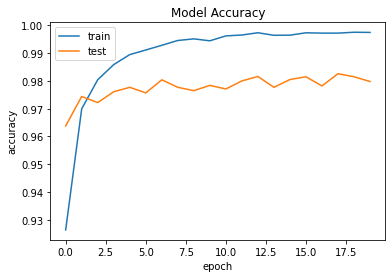

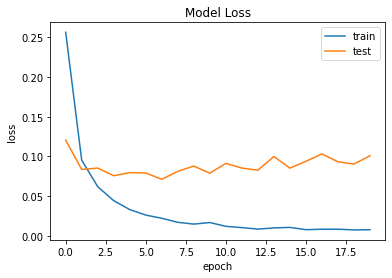

Time:  41.69066348499996 seconds


In [28]:
# Δοκιμή Βέλτιστου (ως προς τις παραμέτρους που έλεγξα) Νευρωνικού Δικτύου!

# Αρχή Χρονομέτρησης
start = timeit.default_timer()

# Σειριακό μοντέλο Νευρωνικού Δικτύου
model = Sequential()
# Kρυφό Eπίπεδο με 256 νευρώνες, 784 διαστάσεις & ReLU συνάρτηση ενεργοποίησης
# Dense = Full Connected (Άρα όλοι οι νευρώνες συνδέονται με όλους)
model.add(Dense(256, input_dim=(784), activation='relu'))
# Ακόμα ένα Kρυφό Eπίπεδο με 256 νευρώνες, 784 διαστάσεις & ReLU συνάρτηση ενεργοποίησης
model.add(Dense(256, input_dim=(784), activation='relu'))
# Επίπεδο Εξόδου με 10 (λόγω των χειρόγραφων ψηφίων) νευρώνες με softmax συνάρτηση ενεργοποίησης
model.add(Dense(10, activation='softmax'))

# Βελτιστοποιητής: Adam και Σφάλμα: Categorical Crossentropy
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# 128 Δείγματα ανα επανάληψη σε 20 εποχές με verbose=1 (για να εμφανίζει τις εποχές!)
results = model.fit(train_data, train_labels, batch_size=128, epochs=20, verbose=1, validation_data=(test_data, test_labels))

# Εμφάνιση αποτελεσμάτων σε 2 Γραφήματα
# Για το accuracy
plt.plot(results.history['accuracy'])
plt.plot(results.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()
# Για το loss
plt.plot(results.history['loss'])
plt.plot(results.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

# Τέλος Χρονομέτρησης
stop = timeit.default_timer()
print('Time: ', stop - start, 'seconds')


Σχόλια: Παρατηρούμε ότι το μοντέλο φτάνει σε σημείο *overfitting* με τις μέγιστες παραμέτρους. Οπότε καλύτερα θα ήταν <u>να σταματήσει στο σημείο που εφάπτονται οι 2 καμπύλες στα παραπάνω γραφήματα</u>!

Δοκιμή του Βέλτιστου Νευρωνικού Δικτύου πάνω στα Δεδομένα μας!

In [29]:
y_pred=model.predict(test_data)
matrix = confusion_matrix(test_labels.argmax(axis=1), y_pred.argmax(axis=1))
display(matrix)

313/313 [==============================] - 1s 1ms/step


array([[ 969,    1,    2,    1,    0,    3,    1,    1,    2,    0],
       [   0, 1123,    2,    0,    0,    0,    2,    3,    4,    1],
       [   0,    0, 1017,    4,    1,    0,    2,    2,    5,    1],
       [   1,    0,    8,  982,    0,    5,    0,    4,    5,    5],
       [   1,    1,    2,    0,  949,    0,    5,    3,    4,   17],
       [   2,    0,    0,    5,    0,  875,    2,    0,    4,    4],
       [   1,    4,    1,    1,    2,   19,  925,    0,    5,    0],
       [   0,    1,    6,    0,    0,    0,    0, 1012,    5,    4],
       [   0,    1,    3,    4,    0,    3,    0,    1,  956,    6],
       [   0,    2,    0,    2,    2,    4,    1,    4,    4,  990]])

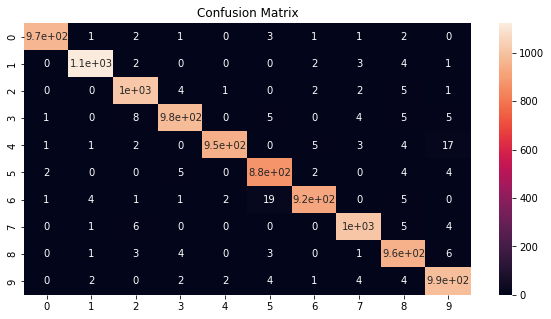

In [30]:
plt.rcParams["figure.figsize"] = (10,5)
ax= plt.subplot()
sns.heatmap(matrix, annot=True, ax = ax);
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(['0', '1','2', '3', '4', '5', '6', '7', '8', '9']); 
ax.yaxis.set_ticklabels(['0', '1','2', '3', '4', '5', '6', '7', '8', '9']);
